<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-excercises?scriptVersionId=106553372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bears-fastai-2021/bears/grizzly/00000030.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000042.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000080.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000027.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000095.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000087.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000089.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000048.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000033.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000016.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000088.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000059.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000094.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000028.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000022.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000054.jpg
/kaggle/input/bears-fastai-2021/bears/grizzly/00000050.j

***My computer vision exercises. I begin study this theme***

2022-09-26 10:04:50.194411: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


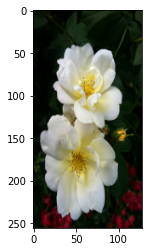

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

def read_and_decode (filename, reshape_dims):
    # read the file
    img = tf.io.read_file (filename = '../input/flowers-recognition/flowers/rose/10090824183_d02c613f10_m.jpg')
    # convert the compressed string to a 3D unit8 tensor
    img = tf.image.decode_jpeg (img, channels = 3)
    # convert 3D unit8 to floats in the [0,1] range
    img = tf.image.convert_image_dtype (img, tf.float32)
    # resize the image to the desired size
    return tf.image.resize (img, reshape_dims)

# visualize image data
IMG_HEIGHT = 256
IMG_WIDTH = 128
def show_image (filename):
    img = read_and_decode (filename, [IMG_HEIGHT, IMG_WIDTH])
    plt.imshow (img.numpy ())
    
show_image ('../input/flowers-recognition/flowers/rose/10090824183_d02c613f10_m.jpg')

***Accessing and manipulating pixels***

In [3]:
import numpy as np
import cv2

# read the rose image and load it into a variable rose_image
rose_image = cv2.imread ('../input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg')

# access a specific pixel using the coordinate based access from the matrix
pixel = rose_image [150, 170]

# see what color space that pixel represents
print (pixel)

# lets change the pixel color value to blue
rose_image [150, 170] = (255, 0, 0)

# lets change the pixel color value to blue in a region range as against
rose_image [120:150, 150:170] = (0, 255, 0)

cv2.line (rose_image, (25, 21), (100, 100), (255, 0, 0), 5)

cv2.rectangle (rose_image, (25, 51), (100, 100), (0, 255, 0), 2)
cv2.circle (rose_image, (50, 50), 50, (0, 0, 255), -1)

[ 26 142 237]


array([[[ 42,  49,  34],
        [ 39,  49,  33],
        [ 39,  51,  33],
        ...,
        [ 13,  42,  16],
        [ 12,  41,  15],
        [ 12,  41,  15]],

       [[ 40,  48,  31],
        [ 37,  47,  30],
        [ 37,  49,  31],
        ...,
        [ 17,  43,  25],
        [ 16,  42,  24],
        [ 15,  41,  23]],

       [[ 38,  46,  29],
        [ 35,  45,  28],
        [ 36,  48,  28],
        ...,
        [ 19,  48,  25],
        [ 18,  48,  23],
        [ 17,  47,  22]],

       ...,

       [[ 31, 140,  91],
        [ 91, 142,  98],
        [ 82, 123,  95],
        ...,
        [ 49,  96,  47],
        [ 48,  95,  46],
        [ 48,  94,  47]],

       [[ 19, 141,  87],
        [ 52, 141,  98],
        [ 80, 123,  90],
        ...,
        [ 48,  97,  43],
        [ 50,  96,  44],
        [ 49,  92,  49]],

       [[ 19, 141,  87],
        [ 56, 145, 102],
        [ 90, 133, 100],
        ...,
        [ 48,  96,  44],
        [ 50,  94,  47],
        [ 47,  91,  50]]

**Compute convolutions - 1 dimensional**

In [4]:
import numpy as np
def conv1d (x, w, p = 0, s = 1):
    w_rot = np.array (w[:: -1])
    x_padded = np.array (x)
    if p > 0:
        zero_pad = np.zeros (shape = p)
        x_padded = np.concatenate ([zero_pad, x_padded, zero_pad])
    res = []
    for i in range (0, int (len (x)/s), s):
        res.append (np.sum (x_padded [i:i + w_rot.shape [0]] * w_rot))
    return np.array (res)

# run the test
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print ('Conv1d Implementation:', conv1d (x, w, p = 2, s = 1))

print ('Numpy Results:', np.convolve (x, w, mode = 'same'))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


**Compute convultions - 2 dimensional**

In [5]:
import scipy.signal

def conv2d (X, W, p = (0, 0), s = (1, 1)):
    W_rot = np.array (W) [::-1, ::-1]
    X_orig = np.array (X)
    n1 = X_orig.shape [0] + 2*p [0]
    n2 = X_orig.shape [1] + 2*p [1]
    X_padded = np.zeros (shape = (n1, n2))
    X_padded [p[0]:p[0] + X_orig.shape [0], p[1]:p[1] + X_orig.shape [1]] = X_orig
    res = []
    for i in range (0, int ((X_padded.shape [0] - W_rot.shape [0])/s[0]) +1, s [0]):
        res.append ([])
        for j in range (0, int ((X_padded.shape [1] - W_rot.shape [1]) /s[1]) +1, s[1]):
            X_sub = X_padded [i:i+W_rot.shape [0],j:j + W_rot.shape [1]]
            res [-1].append (np.sum (X_sub * W_rot))
    return (np.array (res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print ('Conv2d Implementation:\n', conv2d (X, W, p = (1, 1), s = (1, 1)))

print ('Scipy ResultsL \n', scipy.signal.convolve2d (X, W, mode = 'same'))

Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
Scipy ResultsL 
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


**Deep learning with fastai**

In [6]:
from fastai.vision.all import *

results = ('../input/bears-fastai-2021/bears')
len (results)

32

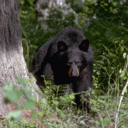

In [7]:
dest = ('../input/bears-fastai-2021/bears/black/00000000.jpg')
im = Image.open (dest)
im.to_thumb (128, 128)

In [8]:
bear_types = 'black', 'grizzly', 'teddy'
path = Path ('../input/bears-fastai-2021/bears')
if not path.exists ():
    path.mkdir ()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir (exist_ok = True)
        results = ('../input/bears-fastai-2021/bears')

In [9]:
fns = get_image_files (path)
fns

(#288) [Path('../input/bears-fastai-2021/bears/grizzly/00000030.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000042.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000080.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000027.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000095.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000087.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000089.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000048.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000033.jpg'),Path('../input/bears-fastai-2021/bears/grizzly/00000016.jpg')...]

In [10]:
class DataLoaders (GetAttr):
    def __init__ (self, *loaders): self.loaders = loaders
    def __getitem__ (self, i): return self.loaders [i]
    train, valid = add_props (lambda i, self: self [i])

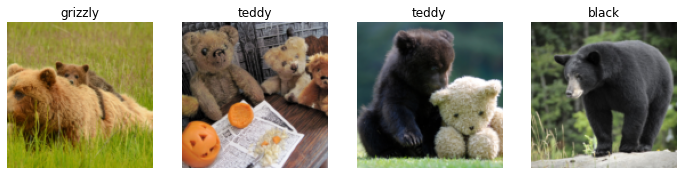

In [11]:
bears = DataBlock (blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter (valid_pct = 0.2, seed = 42),
                  get_y = parent_label, item_tfms = Resize (128))
dls = bears.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

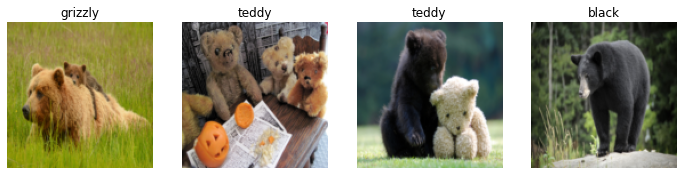

In [12]:
bears = bears.new (item_tfms = Resize (128, ResizeMethod.Squish))
dls = bears.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

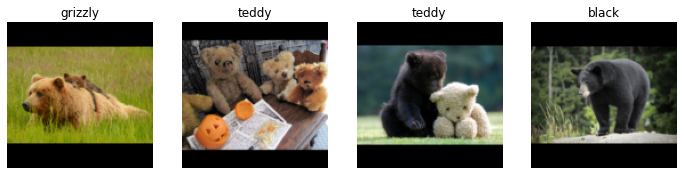

In [13]:
bears = bears.new (item_tfms = Resize (128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = bears.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

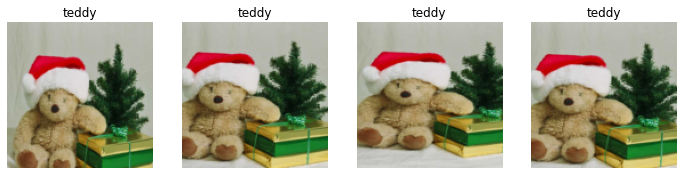

In [14]:
bears = bears.new (item_tfms = RandomResizedCrop (128, min_scale = 0.3))
dls = bears.dataloaders (path)
dls.train.show_batch (max_n = 4, nrows = 1, unique = True)

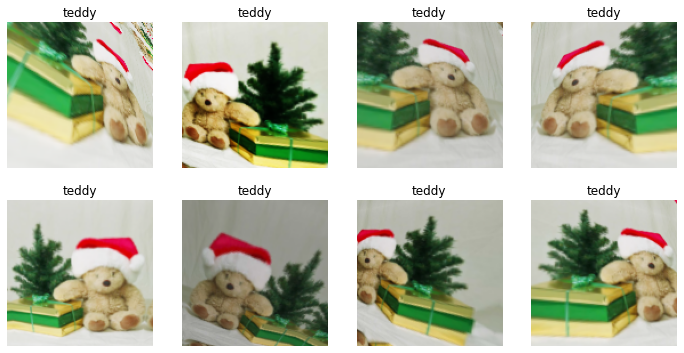

In [15]:
bears = bears.new (item_tfms = Resize (128), batch_tfms = aug_transforms (mult = 2))
dls = bears.dataloaders (path)
dls.train.show_batch (max_n = 8, nrows = 2, unique = True)

In [16]:
bears = bears.new (item_tfms = RandomResizedCrop (224, min_scale = 0.5),
                  batch_tfms = aug_transforms ())
dls = bears.dataloaders (path)
learn = vision_learner (dls, resnet18, metrics = error_rate)
learn.fine_tune (4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.609957,0.379069,0.122807,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.298848,0.141860,0.052632,00:53
1,0.208291,0.047682,0.017544,00:48
2,0.153439,0.017089,0.000000,00:48
3,0.125439,0.010962,0.000000,00:48


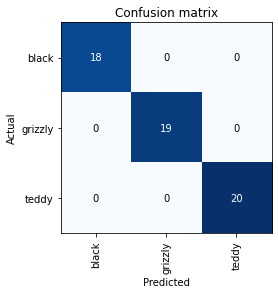

In [17]:
interp = ClassificationInterpretation.from_learner (learn)
interp.plot_confusion_matrix ()

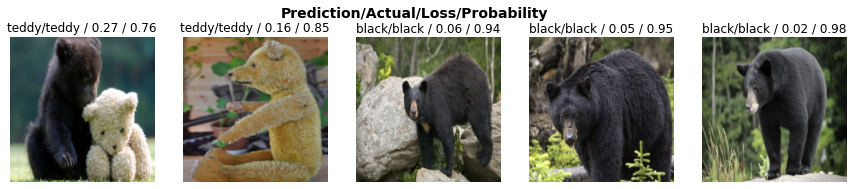

In [18]:
interp.plot_top_losses (5, nrows = 1)

In [19]:
learn.export ()
path = Path ()
path.ls (file_exts ='.pkl')
learn_inf = load_learner (path/'export.pkl')
learn_inf.predict ('../input/bears-fastai-2021/bears/grizzly/00000004.jpg')

('grizzly', TensorBase(1), TensorBase([2.1972e-05, 9.9998e-01, 1.8753e-07]))